<h1>FIFA World Cup Analysis</h1>

In [1]:
# Importing the required libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# Importing datasets
worldcups=pd.read_csv('WorldCups.csv')
matches=pd.read_csv('WorldCupMatches.csv')
players=pd.read_csv('WorldCupPlayers.csv')

Cleaning 'World Cups' Data

In [3]:
worldcups.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [4]:
worldcups.shape

(20, 10)

In [5]:
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [6]:
#Converting 'Attendance' column to int type
worldcups['Attendance']=worldcups['Attendance'].str.replace('.','').astype('int')
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 1.6+ KB


In [7]:
worldcups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [8]:
# Correcting wrong/obsolete team names
worldcups['Winner']=worldcups['Winner'].str.replace('Germany FR','Germany')
worldcups['Runners-Up']=worldcups['Runners-Up'].str.replace('Germany FR','Germany')
worldcups['Third']=worldcups['Third'].str.replace('Germany FR','Germany')
worldcups['Fourth']=worldcups['Fourth'].str.replace('Germany FR','Germany')

In [9]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


Cleaning 'World Cup Matches' Data

In [10]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [12]:
# Removing duplicates in matches table
matches.drop_duplicates(inplace=True)

In [13]:
# Checking for NaN values in Attendance column, as refected in .info() method
matches[matches['Attendance'].isna()==True]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Filling missing value for attendance with the average of attendance from matches where Germany is Home Team in 2014 World Cup
df_2014=matches[matches['Year']==2014]
avg_attendance=round(df_2014[df_2014['Home Team Name']=='Germany']['Attendance'].mean(),0)
matches.loc[823,'Attendance']=avg_attendance

In [15]:
# Removing blank rows from matches table
matches.dropna(inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            836 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           836 no

In [16]:
matches['Home Team Name'].value_counts()

Home Team Name
Brazil                        78
Italy                         57
Argentina                     52
Germany FR                    43
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: count, Length: 78, dtype: int64

In [17]:
# Correcting Team names
matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

Home Team Name
rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
Name: count, dtype: int64

In [18]:
# Correcting Team names
matches[matches['Away Team Name'].str.contains('rn">')]['Away Team Name'].value_counts()

Away Team Name
rn">Republic of Ireland       8
rn">United Arab Emirates      2
rn">Trinidad and Tobago       2
rn">Serbia and Montenegro     2
rn">Bosnia and Herzegovina    2
Name: count, dtype: int64

In [19]:
# Correcting Team names
matches[matches['Home Team Name'].str.contains('Germany')]['Home Team Initials']

22     GER
27     GER
33     GER
79     FRG
91     FRG
      ... 
769    GER
783    GER
799    GER
823    GER
828    GER
Name: Home Team Initials, Length: 75, dtype: object

In [20]:
# Correcting Team names
matches['Home Team Name']=matches['Home Team Name'].str.replace('rn">','')
matches['Away Team Name']=matches['Away Team Name'].str.replace('rn">','')
matches['Home Team Name']=matches['Home Team Name'].str.replace('Germany FR','Germany')
matches['Away Team Name']=matches['Away Team Name'].str.replace('Germany FR','Germany')
matches['Win conditions']=matches['Win conditions'].str.replace('Germany FR','Germany')
matches['Home Team Initials']=matches['Home Team Initials'].str.replace('FRG','GER')
matches['Away Team Initials']=matches['Away Team Initials'].str.replace('FRG','GER')

In [21]:
# Table is now clean
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Cleaning 'World Cup Players' Data

In [22]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [23]:
players.shape

(37784, 9)

In [24]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [25]:
players['Position'].value_counts()

Position
GK     2441
C      1510
GKC     192
Name: count, dtype: int64

In [26]:
players['Event'].value_counts()

Event
OH46'              247
IH46'              206
Y1'                 87
I77'                78
I78'                78
                  ... 
Y58' G59' G81'       1
P4'                  1
Y1' Y49' RSY49'      1
G18' G84'            1
G60' O83'            1
Name: count, Length: 1893, dtype: int64

In [27]:
# Filling blank values with 0
players.fillna(0, inplace=True)

In [28]:
# Correcting Team names
players['Team Initials']=players['Team Initials'].str.replace('FRG','GER')

In [29]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,0
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,0
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,0,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,0,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,0,0


Feature Engineering

In [30]:
# Removing whitespaces from the column
matches['Win conditions']=matches['Win conditions'].str.strip()

In [31]:
# Creating Winner column
for i in list(matches.index):
    if matches.loc[i,'Home Team Goals'] > matches.loc[i,'Away Team Goals']: matches.loc[i,'Winner']=matches.loc[i,'Home Team Name']
    elif matches.loc[i,'Home Team Goals'] < matches.loc[i,'Away Team Goals']: matches.loc[i,'Winner']=matches.loc[i,'Away Team Name']
    elif matches.loc[i,'Home Team Name'] in matches.loc[i,'Win conditions']: matches.loc[i,'Winner']=matches.loc[i,'Home Team Name']
    elif matches.loc[i,'Away Team Name'] in matches.loc[i,'Win conditions']: matches.loc[i,'Winner']=matches.loc[i,'Away Team Name']
    elif matches.loc[i,'Win conditions']=='': matches.loc[i,'Winner']='Draw'
    elif int(matches.loc[i,'Win conditions'][-2])<int(matches.loc[i,'Win conditions'][-6]): matches.loc[i,'Winner']=matches.loc[i,'Home Team Name']
    elif int(matches.loc[i,'Win conditions'][-2])>int(matches.loc[i,'Win conditions'][-6]): matches.loc[i,'Winner']=matches.loc[i,'Home Team Name']
    

In [32]:
matches.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Yugoslavia
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Romania
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,...,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX,Chile
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,...,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL,Yugoslavia
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,...,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR,USA
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,...,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER,Uruguay
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,...,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA,Chile


In [33]:
players['Event'].value_counts()

Event
0                  28715
OH46'                247
IH46'                206
Y1'                   87
I77'                  78
                   ...  
Y58' G59' G81'         1
P4'                    1
Y1' Y49' RSY49'        1
G18' G84'              1
G60' O83'              1
Name: count, Length: 1894, dtype: int64

In [34]:
# Removing Event time from column
players['Event']=players['Event'].str.replace('\d+', '',regex=True)
players['Event'].value_counts()

Event
I'             2342
O'             2034
Y'             1468
G'             1112
Y' O'           288
               ... 
G' G' G' P'       1
G' Y' P' O'       1
IH' G' Y'         1
IH' R'            1
P' OH'            1
Name: count, Length: 100, dtype: int64

In [35]:
# Populating Events as individual columns and dropping Event column
players['Goal']=players['Event'].str.count("G'")
players['Penalty Goal']=players['Event'].str.count("P'")-players['Event'].str.count("MP'")
players['Yellow Card']=players['Event'].str.count("Y'")
players['Red Card']=players['Event'].str.count("R'")
players['Offside']=players['Event'].str.count("O'")
players['Injured']=players['Event'].str.count("I'")
players['Own Goal']=players['Event'].str.count("W'")
players['HalfTime IN']=players['Event'].str.count("IH'")
players['HalfTime OUT']=players['Event'].str.count("OH'")
players['Missed Penalty']=players['Event'].str.count("MP'")
players.fillna(0, inplace=True)
players.drop(columns='Event',inplace=True)

Data Analysis

In [36]:
# Function for Bar Plots
def barplot(data,x,y,title,pal):
    plt.figure(figsize=(10,5))
    sns.barplot(data=data, x=x, y=y, palette=pal)
    plt.title(title)
    plt.ylabel(y)
    plt.show()

In [37]:
# Function for Line Plots
def lineplot(data,x,y,title):
    plt.figure(figsize=(15,3))
    sns.lineplot(data=data, x=x, y=y, color='purple', marker='*', markersize=12)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(data[x])
    plt.show()

In [38]:
worldcups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1974.800000,118.950000,21.250000,41.800000,1.872882e+06
std,25.582889,32.972836,7.268352,17.218717,1.071842e+06
min,1930.000000,70.000000,13.000000,17.000000,3.630000e+05
25%,1957.000000,89.000000,16.000000,30.500000,8.748315e+05
50%,1976.000000,120.500000,16.000000,38.000000,1.734864e+06
75%,1995.000000,145.250000,26.000000,55.000000,2.725173e+06
max,2014.000000,171.000000,32.000000,64.000000,3.587538e+06


In [39]:
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 1.6+ KB


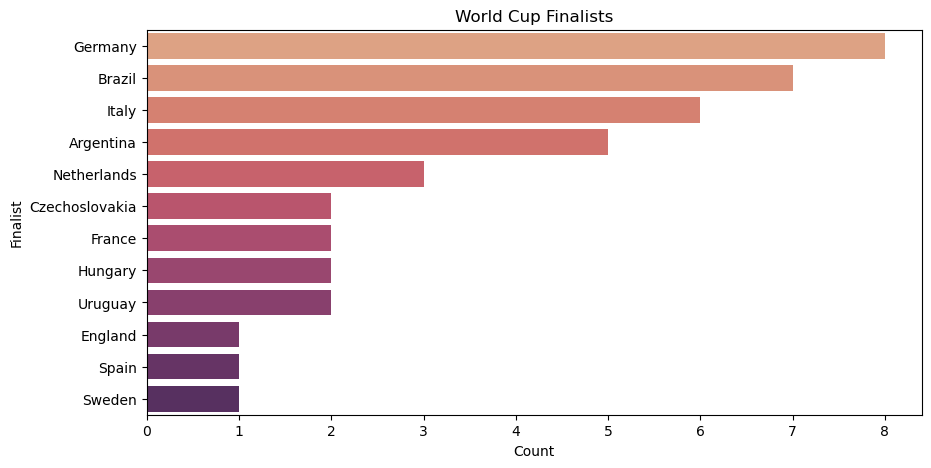

In [40]:
winners=worldcups[['Winner']]
runners=worldcups[['Runners-Up']]
winners.columns=['Finalist']
runners.columns=['Finalist']

wc_finalists = pd.concat([winners,runners],axis=0).reset_index(drop=True).groupby(['Finalist'])[['Finalist']].count()
wc_finalists.columns=['Count']
wc_finalists = wc_finalists.sort_values(by=['Count'],ascending=False).reset_index()

plottitle = 'World Cup Finalists'
barplot(wc_finalists,'Count','Finalist',plottitle,'flare')

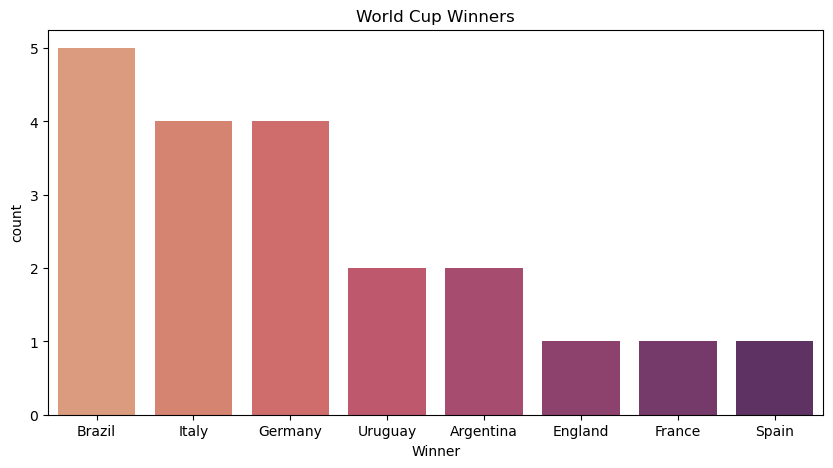

In [41]:
wc_winners=worldcups['Winner'].value_counts().reset_index()

plottitle = 'World Cup Winners'
barplot(wc_winners,'Winner','count',plottitle,'flare')

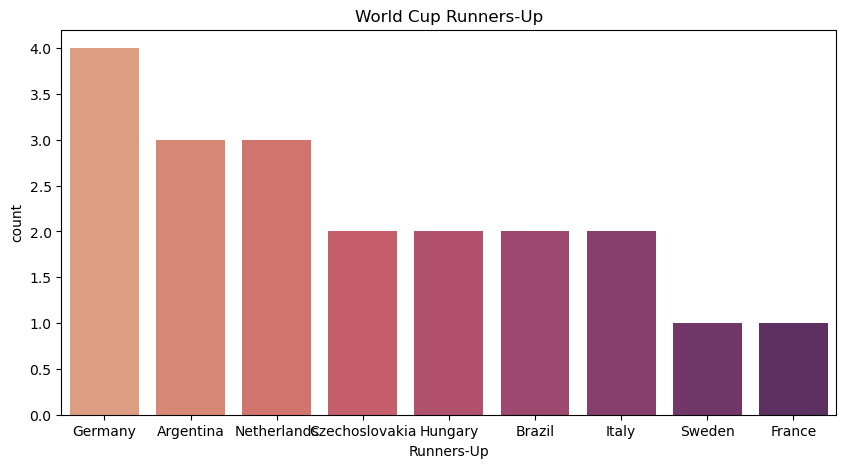

In [42]:
wc_runnerup=worldcups['Runners-Up'].value_counts().reset_index()

plottitle = 'World Cup Runners-Up'
barplot(wc_runnerup,'Runners-Up','count',plottitle,'flare')

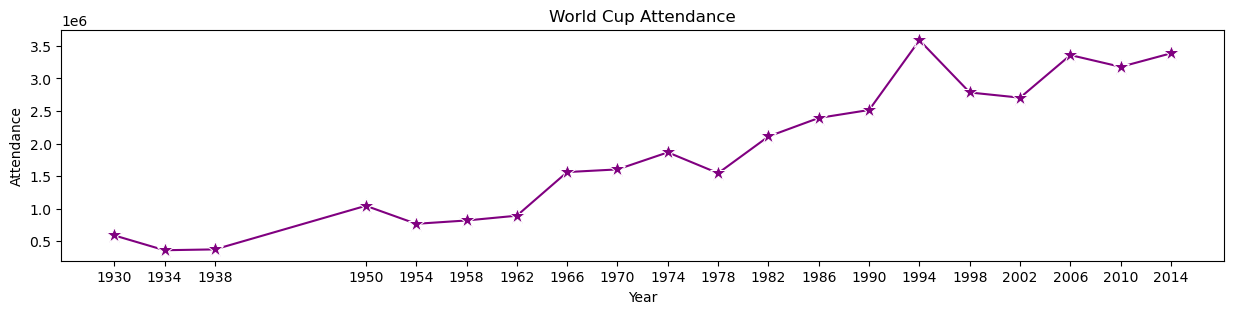

In [43]:
plottitle = 'World Cup Attendance'
lineplot(worldcups,'Year','Attendance',plottitle)

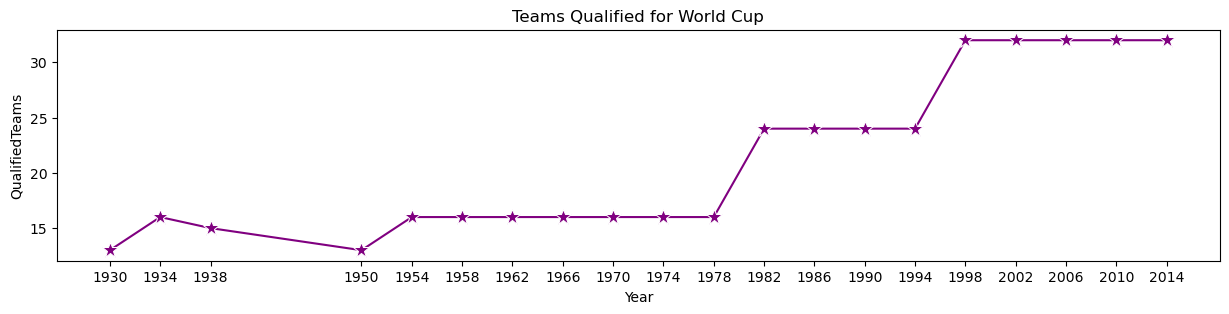

In [44]:
plottitle = 'Teams Qualified for World Cup'
lineplot(worldcups,'Year','QualifiedTeams',plottitle)

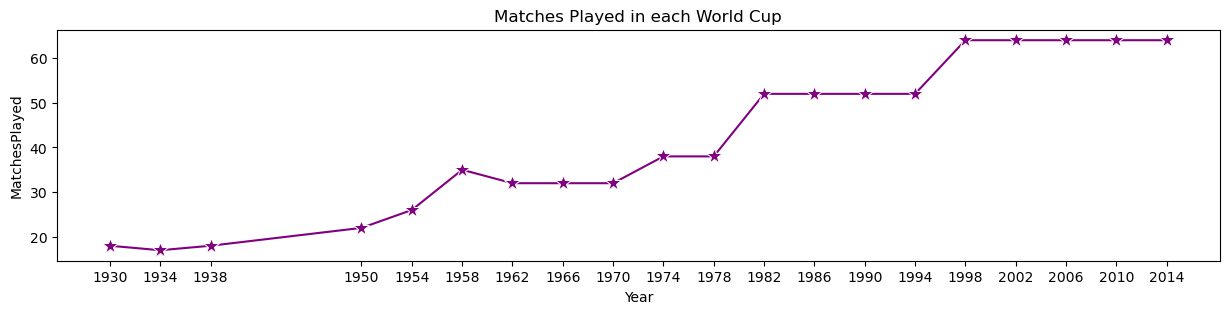

In [45]:
plottitle = 'Matches Played in each World Cup'
lineplot(worldcups,'Year','MatchesPlayed',plottitle)

In [46]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,8.360000e+02
mean,1984.535885,1.824163,1.021531,44879.736842,0.718900,0.427033,1.086093e+07,5.677577e+07
std,22.299860,1.619178,1.072024,23544.303618,0.941995,0.675091,2.751802e+07,1.070329e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000,2.620000e+02,1.183500e+03
50%,1990.000000,2.000000,1.000000,41061.500000,0.000000,0.000000,3.370000e+02,2.113500e+03
75%,2002.000000,3.000000,2.000000,61071.500000,1.000000,1.000000,2.497220e+05,4.395005e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [47]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Winner
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Yugoslavia
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Romania
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina


In [48]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 835
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    float64
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    float64
 7   Away Team Goals       836 non-null    float64
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            836 non-null    float64
 11  Half-time Home Goals  836 non-null    float64
 12  Half-time Away Goals  836 non-null    float64
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant 2           836 no

In [49]:
home_matches = pd.DataFrame(matches['Home Team Name'].value_counts()).reset_index()
away_matches = pd.DataFrame(matches['Away Team Name'].value_counts()).reset_index()
home_matches.columns=['Team','Matches']
away_matches.columns=['Team','Matches']

match_count = pd.concat([home_matches,away_matches],axis=0)
match_count = match_count.groupby('Team')[['Matches']].sum().reset_index().sort_values(by='Matches',ascending=False)

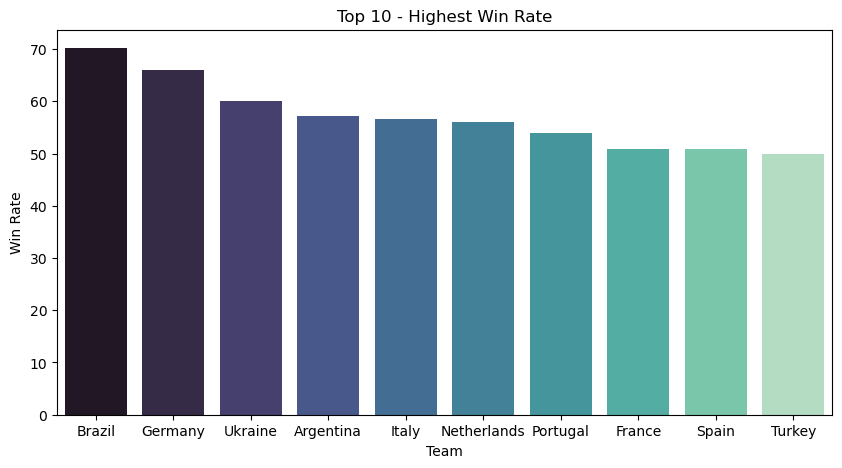

In [50]:
win_count = pd.DataFrame(matches['Winner'].value_counts()).reset_index()

m_avg_wins = pd.merge(match_count, win_count, left_on='Team', right_on='Winner', how='left').drop('Winner', axis=1).fillna(0)
m_avg_wins.columns=['Team','Matches','Wins']
m_avg_wins['Win Rate'] = round(100 * m_avg_wins['Wins']/m_avg_wins['Matches'],2)

m_avg_wins = m_avg_wins.sort_values(by='Win Rate', ascending=False).head(10)
m_avg_wins

plottitle = 'Top 10 - Highest Win Rate'
barplot(m_avg_wins,'Team','Win Rate',plottitle,'mako')

In [51]:
home_team_goals=matches[['Home Team Name','Home Team Goals']]
away_team_goals=matches[['Away Team Name','Away Team Goals']]
home_team_goals.columns=['Team Name', 'Goals']
away_team_goals.columns=['Team Name', 'Goals']

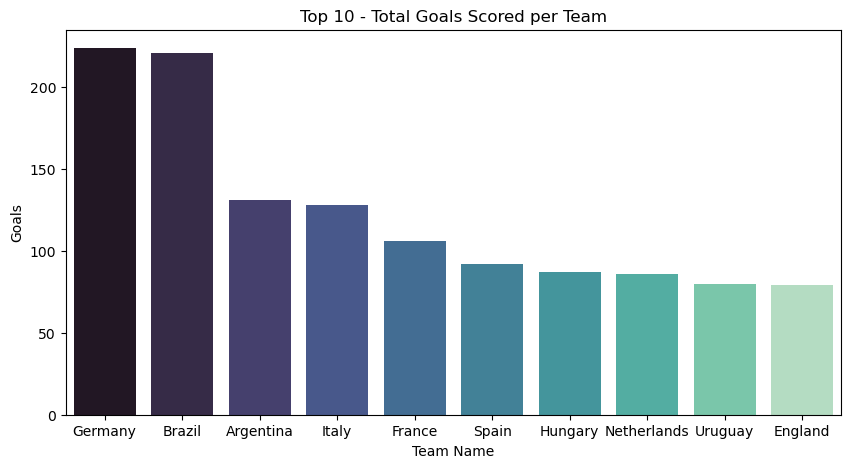

In [52]:
m_team_goals=pd.concat([home_team_goals,away_team_goals],axis=0).reset_index(drop=True)
m_team_goals=m_team_goals.groupby('Team Name')['Goals'].sum().sort_values(ascending=False).reset_index().head(10)

plottitle = 'Top 10 - Total Goals Scored per Team'
barplot(m_team_goals,'Team Name','Goals',plottitle,'mako')

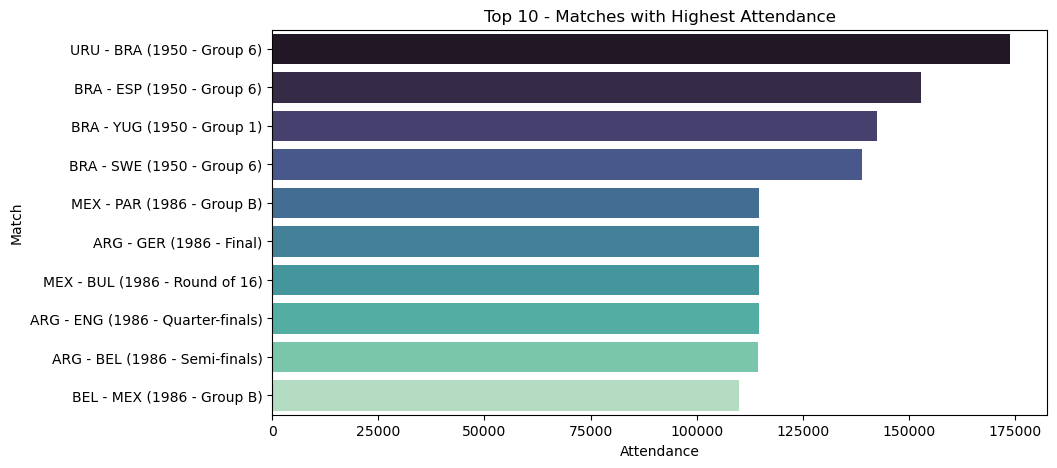

In [53]:
m_attendance = matches[['Year','Stage','Home Team Initials','Away Team Initials','Winner','Attendance']].sort_values(by='Attendance',ascending=False).reset_index(drop=True).head(10)
m_attendance['Match'] = m_attendance['Home Team Initials']+' - '+m_attendance['Away Team Initials']+' ('+m_attendance['Year'].astype('int').astype('str')+' - '+m_attendance['Stage']+')'

plottitle = 'Top 10 - Matches with Highest Attendance'
barplot(m_attendance,'Attendance','Match',plottitle,'mako')

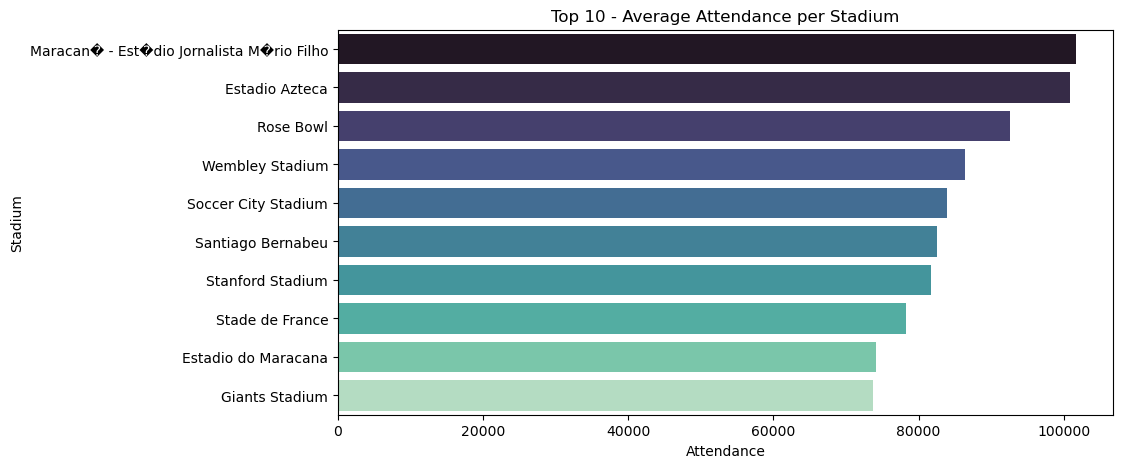

In [54]:
m_stadium_att=matches.groupby('Stadium')['Attendance'].mean().sort_values(ascending=False).reset_index().head(10)

plottitle = 'Top 10 - Average Attendance per Stadium'
barplot(m_stadium_att,'Attendance','Stadium',plottitle,'mako')

In [55]:
players.describe()

,RoundID,MatchID,Shirt Number,Goal,Penalty Goal,Yellow Card,Red Card,Offside,Injured,Own Goal,HalfTime IN,HalfTime OUT,Missed Penalty
count,3.778400e+04,3.778400e+04,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022,0.058067,0.004711,0.060819,0.003097,0.069421,0.070003,0.001112,0.007913,0.007860,0.000291
std,2.770144e+07,1.123916e+08,6.960138,0.272256,0.071130,0.255694,0.055561,0.254172,0.255156,0.033322,0.088606,0.088311,0.017060
min,2.010000e+02,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.630000e+02,1.199000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.370000e+02,2.216000e+03,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.559310e+05,9.741000e+07,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.741060e+07,3.001865e+08,23.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#Players who have scored most Goals in a single World Cup match
players[players['Goal']==4]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Goal,Penalty Goal,Yellow Card,Red Card,Offside,Injured,Own Goal,HalfTime IN,HalfTime OUT,Missed Penalty
1610,206,1150,POL,KALUZA Jozef (POL),S,0,Ernest WILIMOWSKI,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2881,209,1189,BRA,COSTA Flavio (BRA),S,0,ADEMIR,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,211,1277,HUN,SEBES Gusztav (HUN),S,8,Sandor KOCSIS,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5675,3483,1382,FRA,BATTEAUX Albert (FRA),S,17,Just FONTAINE,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21540,337,3079,RUS,SADYRIN Pavel (RUS),S,9,Oleg SALENKO,0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


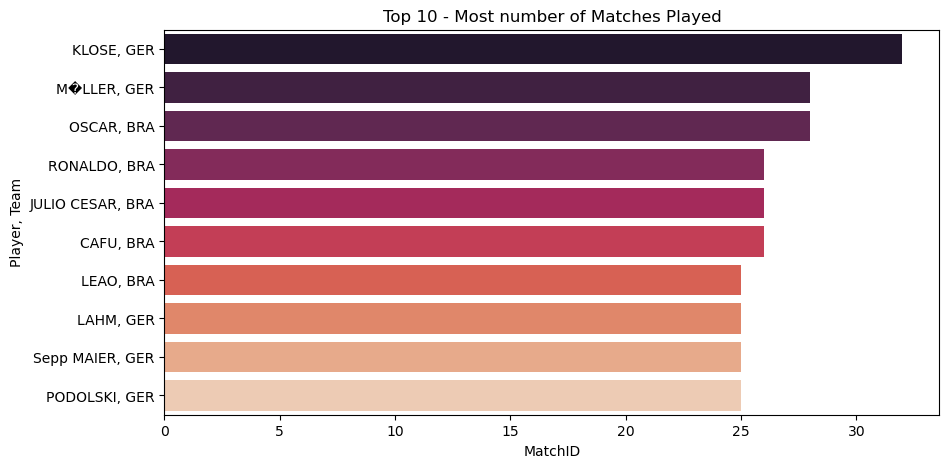

In [57]:
# Top 10 - Most Matches
p_matches = players.groupby(['Player Name','Team Initials'])[['MatchID']].count().reset_index()
p_matches['Player, Team'] = p_matches['Player Name']+', '+p_matches['Team Initials']
p_matches = p_matches.sort_values(by='MatchID', ascending=False).head(10)

plottitle = 'Top 10 - Most number of Matches Played'
barplot(p_matches,'MatchID','Player, Team',plottitle,'rocket')

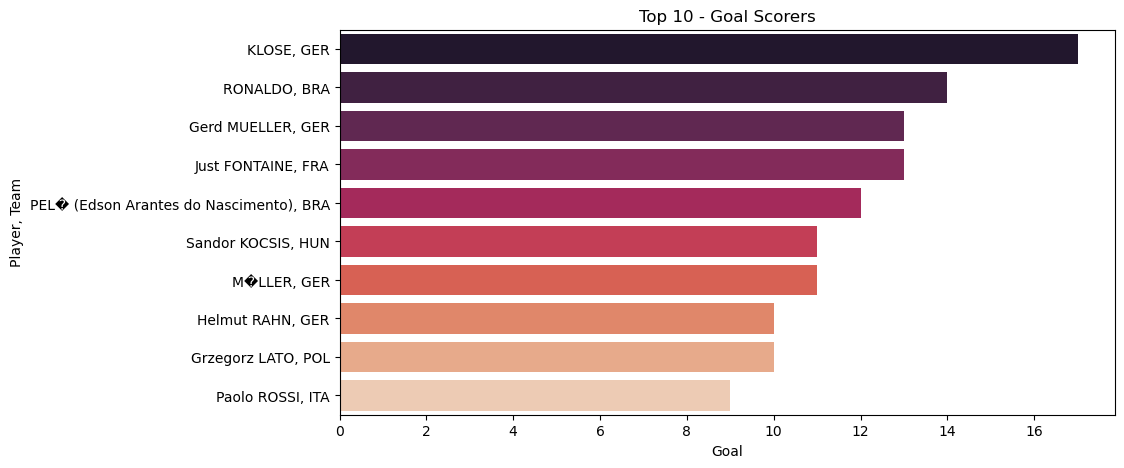

In [58]:
# Top 10 Highest Goal Scorers in World Cups
p_total_goals = players.groupby(['Player Name','Team Initials'])[['Goal']].sum().reset_index()
p_total_goals['Player, Team'] = p_total_goals['Player Name']+', '+p_total_goals['Team Initials']
p_total_goals = p_total_goals.sort_values(by='Goal', ascending=False).head(10)

plottitle = 'Top 10 - Goal Scorers'
barplot(p_total_goals,'Goal','Player, Team',plottitle,'rocket')

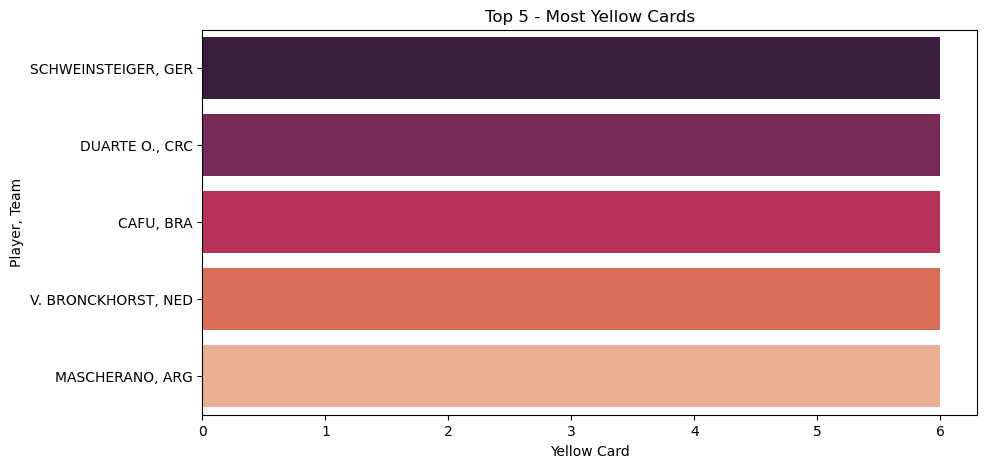

In [59]:
# Top 5 - Yellow Cards
p_yellowcards = players.groupby(['Player Name','Team Initials'])[['Yellow Card']].sum().reset_index()
p_yellowcards['Player, Team'] = p_yellowcards['Player Name']+', '+p_yellowcards['Team Initials']
p_yellowcards = p_yellowcards.sort_values(by='Yellow Card', ascending=False).head()

plottitle = 'Top 5 - Most Yellow Cards'
barplot(p_yellowcards,'Yellow Card','Player, Team',plottitle,'rocket')

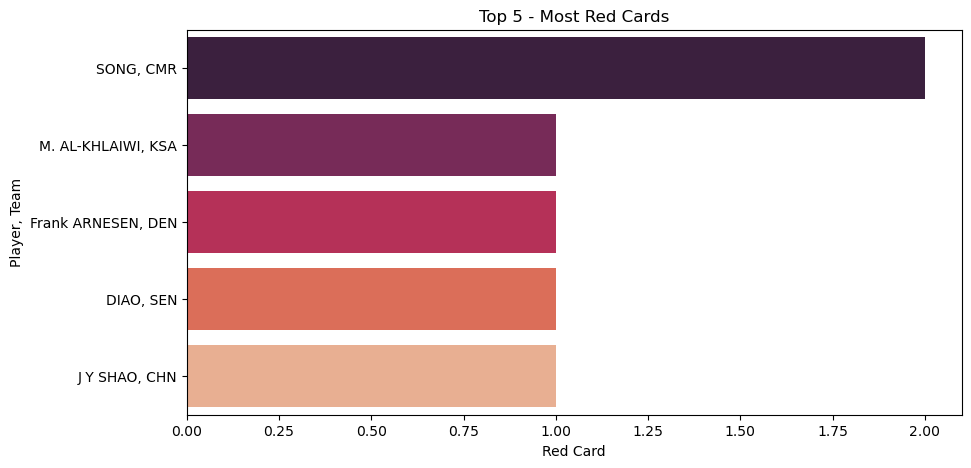

In [60]:
# Top 5 - Red Cards
p_redcards = players.groupby(['Player Name','Team Initials'])[['Red Card']].sum().reset_index()
p_redcards['Player, Team'] = p_redcards['Player Name']+', '+p_redcards['Team Initials']
p_redcards = p_redcards.sort_values(by='Red Card', ascending=False).head()

plottitle = 'Top 5 - Most Red Cards'
barplot(p_redcards,'Red Card','Player, Team',plottitle,'rocket')